Este bloque muestra las versiones instaladas de NumPy, TensorFlow y OpenCV para verificar compatibilidad y asegurar que el entorno está listo para ejecutar modelos y procesar imágenes.

In [2]:
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

print("NumPy:", np.__version__)
print("TensorFlow:", tf.__version__)
print("OpenCV:", cv2.__version__)

NumPy: 2.0.2
TensorFlow: 2.19.0
OpenCV: 4.12.0


Este bloque carga el conjunto de datos MNIST desde TensorFlow, que contiene imágenes de dígitos escritos a mano. Imprime las dimensiones de los datos de entrenamiento y prueba para confirmar que hay 60,000 imágenes de entrenamiento y 10,000 de prueba, todas de tamaño 28×28.

In [3]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(f"Training images shape: {train_images.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Testing images shape: {test_images.shape}")
print(f"Testing labels shape: {test_labels.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Testing images shape: (10000, 28, 28)
Testing labels shape: (10000,)


Este bloque genera una gráfica de barras que muestra cuántas imágenes de entrenamiento hay para cada clase del conjunto MNIST. Sirve para verificar que el dataset está balanceado entre los dígitos del 0 al 9.

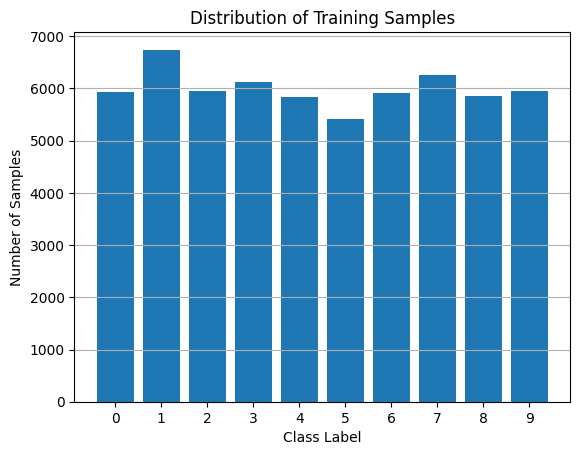

In [4]:
unique, counts = np.unique(train_labels, return_counts=True)
plt.bar(unique, counts, tick_label=unique)
plt.title('Distribution of Training Samples')
plt.xlabel('Class Label')
plt.ylabel('Number of Samples')
plt.grid(axis='y')
plt.show()

Este bloque imprime el valor mínimo y máximo de los píxeles en el conjunto de imágenes de entrenamiento. Confirma que las imágenes están en escala de grises de 8 bits, con valores entre 0 y 255, lo cual es útil para decidir si se necesita normalización antes de entrenar el modelo.

In [5]:
print(f"Min pixel value in training set: {train_images.min()}")
print(f"Max pixel value in training set: {train_images.max()}")

Min pixel value in training set: 0
Max pixel value in training set: 255


Este bloque construye y compila una red neuronal secuencial para clasificar imágenes del conjunto MNIST. Usa capas `Flatten` y `Dense` con activaciones ReLU y softmax, y se entrena con el optimizador Adam y la función de pérdida `sparse_categorical_crossentropy`. Al final, se imprime el resumen del modelo para visualizar su arquitectura.


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential()

model.add(Flatten(input_shape=(28, 28)))


model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.001)

model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Este bloque entrena el modelo usando el conjunto MNIST y aplica la técnica de *early stopping*. Esto detiene el entrenamiento si la precisión en validación no mejora después de 10 épocas, evitando sobreajuste. Además, se restauran los mejores pesos obtenidos durante el proceso.


In [7]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

history = model.fit(train_images, train_labels, epochs=50, validation_split=0.4, batch_size=32, callbacks=[early_stop])

Epoch 1/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7807 - loss: 6.9548 - val_accuracy: 0.8940 - val_loss: 0.7020
Epoch 2/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9102 - loss: 0.4804 - val_accuracy: 0.9189 - val_loss: 0.4522
Epoch 3/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9339 - loss: 0.2819 - val_accuracy: 0.9265 - val_loss: 0.3688
Epoch 4/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9455 - loss: 0.2099 - val_accuracy: 0.9308 - val_loss: 0.2942
Epoch 5/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9518 - loss: 0.1728 - val_accuracy: 0.9302 - val_loss: 0.2886
Epoch 6/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9575 - loss: 0.1476 - val_accuracy: 0.9440 - val_loss: 0.2258
Epoch 7/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9621 - loss: 0.1257 - val_accuracy: 0.9495 - val_loss: 0.2089
Epoch 8/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9631 - loss: 0.1309 - 

Este bloque genera dos gráficas que muestran cómo evolucionaron la precisión y la pérdida durante el entrenamiento del modelo. Se trazan tanto los valores de entrenamiento como los de validación, y se marca con una línea roja el punto donde se activó el *early stopping*, es decir, la época con mejor desempeño antes de que el modelo dejara de mejorar. Esto permite visualizar si hubo sobreajuste y cuándo se alcanzó el mejor resultado.


En las gráficas se observa que el modelo mejora su precisión de entrenamiento de forma constante, mientras que la precisión de validación se estabiliza cerca de la época 36. A partir de ahí, la pérdida de validación comienza a aumentar, lo que indica sobreajuste. Por eso se activa el *early stopping*, deteniendo el entrenamiento en el punto óptimo antes de que el modelo pierda capacidad de generalización.

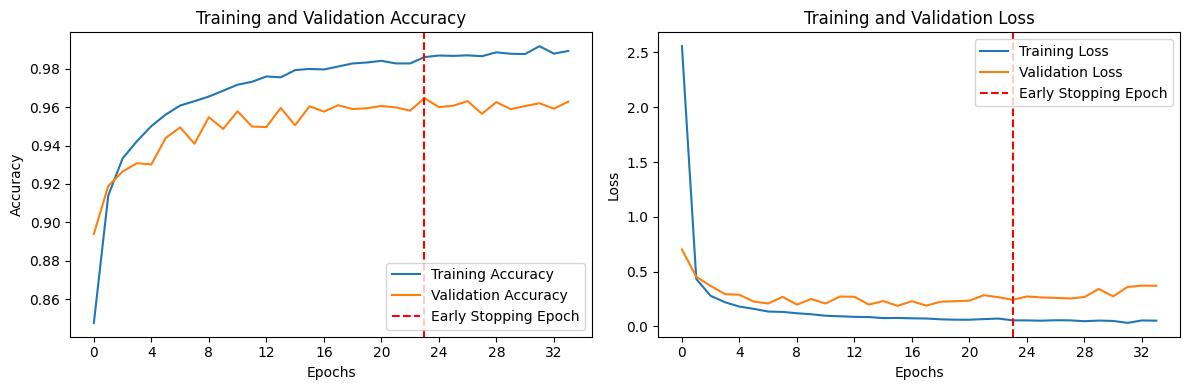

In [8]:
from matplotlib.ticker import MaxNLocator

stopped_epoch = early_stop.stopped_epoch
best_epoch = stopped_epoch - early_stop.patience

plt.figure(figsize=(12, 4))


plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axvline(x=best_epoch, color='r', linestyle='--', label='Early Stopping Epoch')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.axvline(x=best_epoch, color='r', linestyle='--', label='Early Stopping Epoch')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend()

plt.tight_layout()
plt.show()

Este bloque guarda el modelo entrenado en un archivo llamado `my_model.h5` usando el formato HDF5. Aunque aparece una advertencia, el guardado se realiza correctamente y permite reutilizar el modelo más adelante sin necesidad de reentrenarlo.


In [9]:
model.save("my_model.h5")

Este código permite evaluar un conjunto de imágenes personalizadas usando un modelo previamente entrenado. Primero, se cargan imágenes desde el sistema local o desde un archivo .zip, y se almacenan en una carpeta temporal. Se detectan automáticamente los archivos válidos con extensiones como .png, .jpg, .jpeg o .bmp.
Luego, se aplica un preprocesamiento básico a cada imagen: se convierte a escala de grises, se binariza con un umbral fijo, se invierte el color (fondo blanco a negro), y se redimensiona a 28×28 píxeles para que coincida con el formato del modelo. También se intenta extraer la etiqueta real desde el nombre del archivo si está disponible.
Una vez procesadas, las imágenes se pasan al modelo cargado (my_model.h5) para obtener las predicciones. Se calcula la clase predicha y el nivel de confianza para cada imagen. Los resultados se imprimen en consola y se visualizan en una cuadrícula, mostrando la predicción junto con la etiqueta real si existe.
Finalmente, se calcula la exactitud del modelo sobre ese subconjunto, lo que permite evaluar su rendimiento en datos personalizados.


Sube imágenes (.png/.jpg/...)


Saving 0_img1.jpeg to 0_img1.jpeg
Saving 0_img2.jpeg to 0_img2.jpeg
Saving 0_img3.jpeg to 0_img3.jpeg
Saving 0_img4.jpeg to 0_img4.jpeg
Saving 0_img5.jpeg to 0_img5.jpeg
Saving 1_img1.jpeg to 1_img1.jpeg
Saving 1_img2.jpeg to 1_img2.jpeg
Saving 1_img3.jpeg to 1_img3.jpeg
Saving 1_img4.jpeg to 1_img4.jpeg
Saving 1_img5.jpeg to 1_img5.jpeg
Saving 2_img1.jpeg to 2_img1.jpeg
Saving 2_img2.jpeg to 2_img2.jpeg
Saving 2_img3.jpeg to 2_img3.jpeg
Saving 2_img4.jpeg to 2_img4.jpeg
Saving 2_img5.jpeg to 2_img5.jpeg
Saving 3_img1.jpeg to 3_img1.jpeg
Saving 3_img2.jpeg to 3_img2.jpeg
Saving 3_img3.jpeg to 3_img3.jpeg
Saving 3_img4.jpeg to 3_img4.jpeg
Saving 3_img5.jpeg to 3_img5.jpeg
Saving 4_img1.jpeg to 4_img1.jpeg
Saving 4_img2.jpeg to 4_img2.jpeg
Saving 4_img3.jpeg to 4_img3.jpeg
Saving 4_img4.jpeg to 4_img4.jpeg
Saving 4_img5.jpeg to 4_img5.jpeg
Saving 5_img1.jpeg to 5_img1.jpeg
Saving 5_img2.jpeg to 5_img2.jpeg
Saving 5_img3.jpeg to 5_img3.jpeg
Saving 5_img4.jpeg to 5_img4.jpeg
Saving 5_img5.


Idx | gt | pred | prob  | archivo
----+----+------+-------+--------------------------------
01  |  0 |   0  | 0.380 | 0_img1.jpeg
02  |  0 |   0  | 0.678 | 0_img2.jpeg
03  |  0 |   2  | 0.529 | 0_img3.jpeg
04  |  0 |   2  | 0.672 | 0_img4.jpeg
05  |  0 |   5  | 0.731 | 0_img5.jpeg
06  |  1 |   2  | 0.978 | 1_img1.jpeg
07  |  1 |   8  | 0.206 | 1_img2.jpeg
08  |  1 |   0  | 0.777 | 1_img3.jpeg
09  |  1 |   8  | 0.206 | 1_img4.jpeg
10  |  1 |   1  | 0.925 | 1_img5.jpeg
11  |  2 |   2  | 1.000 | 2_img1.jpeg
12  |  2 |   2  | 0.941 | 2_img2.jpeg
13  |  2 |   2  | 0.489 | 2_img3.jpeg
14  |  2 |   8  | 0.501 | 2_img4.jpeg
15  |  2 |   8  | 0.506 | 2_img5.jpeg
16  |  3 |   3  | 0.916 | 3_img1.jpeg
17  |  3 |   5  | 0.769 | 3_img2.jpeg
18  |  3 |   5  | 0.687 | 3_img3.jpeg
19  |  3 |   7  | 0.990 | 3_img4.jpeg
20  |  3 |   3  | 0.786 | 3_img5.jpeg
21  |  4 |   7  | 1.000 | 4_img1.jpeg
22  |  4 |   7  | 0.872 | 4_img2.jpeg
23  |  4 |   7  | 0.966 | 4_img3.jpeg
24  |  4 |   7  | 1.000 | 4_img4.

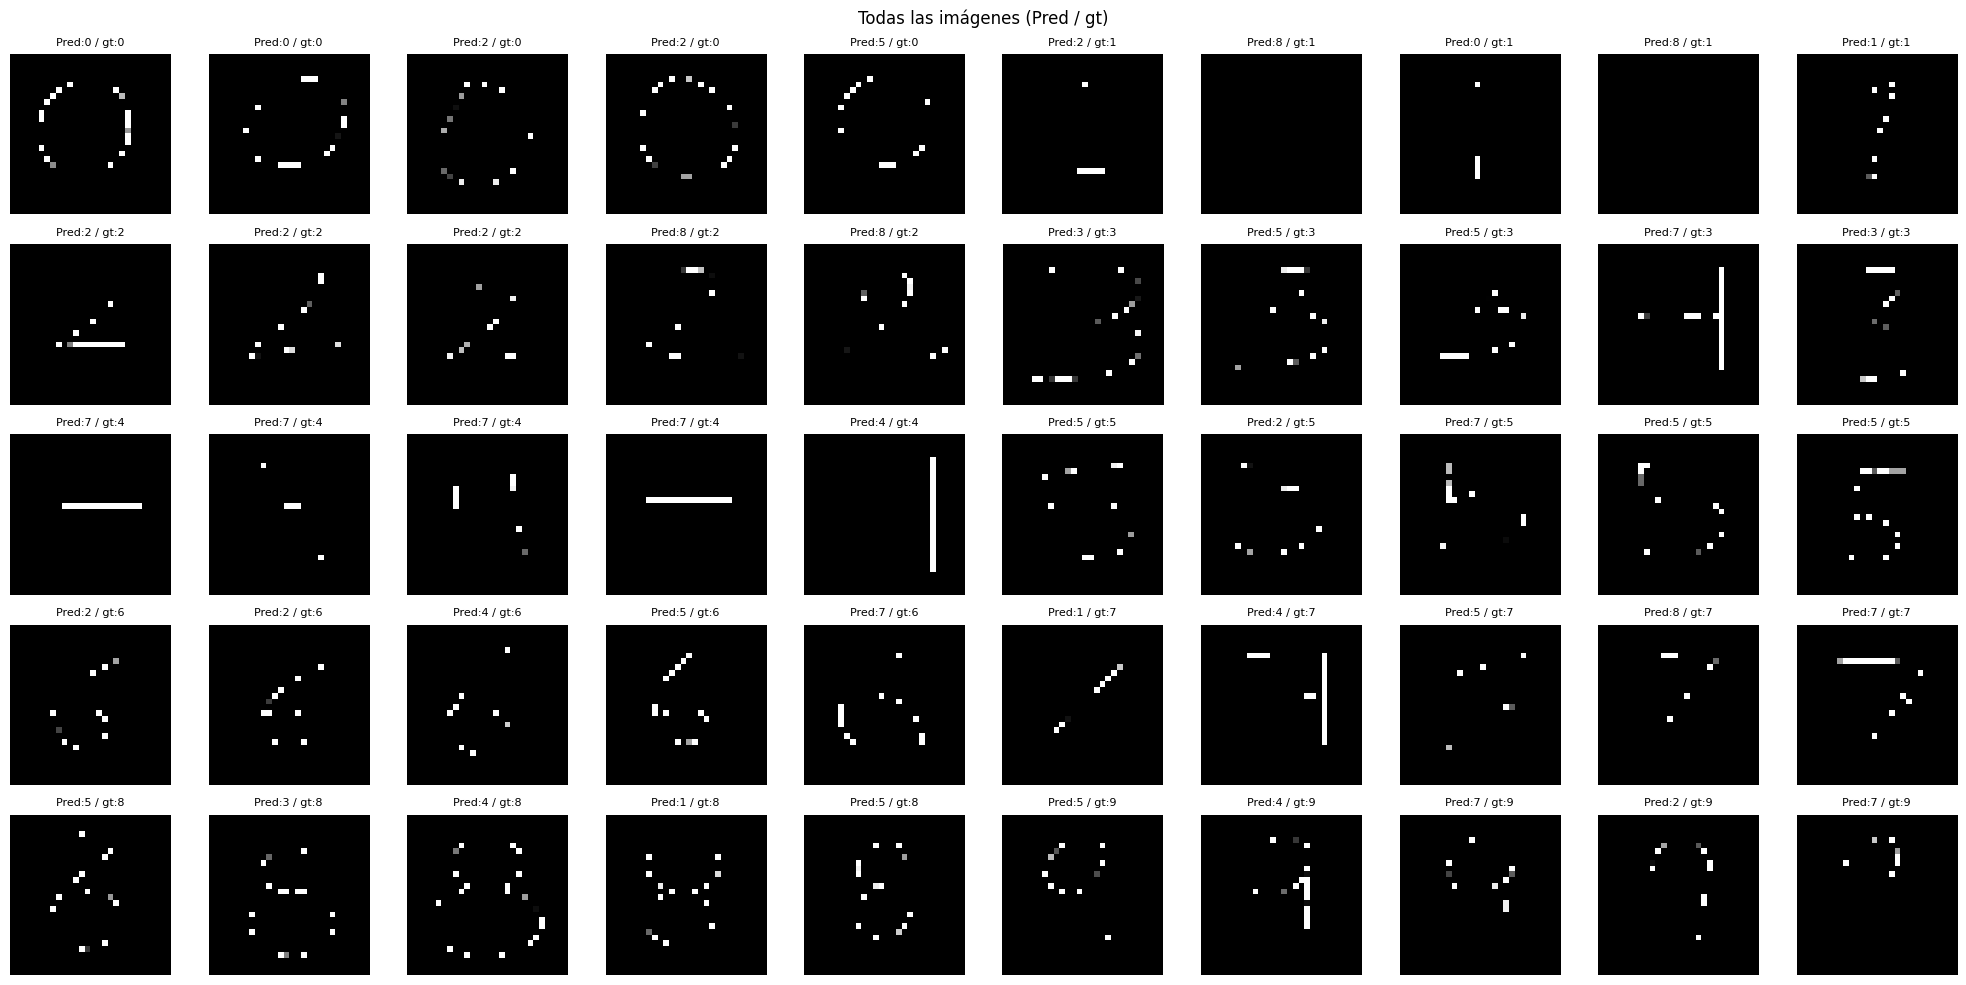


Exactitud en tus imágenes (etiquetadas): 0.2600



In [10]:
from google.colab import files
import os, zipfile, io, glob, shutil
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import math
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


print("Sube imágenes (.png/.jpg/...)")
uploaded = files.upload()

root_dir = "/content/user_images"

if os.path.exists(root_dir):
    shutil.rmtree(root_dir)

os.makedirs(root_dir, exist_ok=True)
all_paths = []

for name, data in uploaded.items():
    dest = os.path.join(root_dir, name)
    with open(dest, "wb") as f:
        f.write(data)
    if name.lower().endswith(".zip"):
        with zipfile.ZipFile(io.BytesIO(data), 'r') as z:
            z.extractall(root_dir)
    else:
        all_paths.append(dest)

ALLOWED_EXTS = (".png", ".jpg", ".jpeg", ".bmp")
for ext in ALLOWED_EXTS:
    all_paths += glob.glob(os.path.join(root_dir, "**", f"*{ext}"), recursive=True)

all_paths = sorted({p for p in all_paths if p.lower().endswith(ALLOWED_EXTS)})
print("Total imágenes detectadas:", len(all_paths))
if not all_paths:
    raise SystemExit("No se encontraron imágenes válidas.")

# === Preprocesamiento ===
def preprocess_to_mnist(img):
    _, thresh = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY_INV)
    resized = cv2.resize(thresh, (28, 28))
    return resized

def infer_label_from_path(path):
    for d in range(10):
        if f"/{d}/" in path or f"\\{d}\\" in path or f"{d}_" in os.path.basename(path):
            return d
    return None

X_user, y_user, names = [], [], []
for p in all_paths:
    img = cv2.imread(p, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print("[AVISO] No se pudo leer:", p)
        continue
    X_user.append(preprocess_to_mnist(img))
    y_user.append(infer_label_from_path(p))
    names.append(os.path.basename(p))

X_user = np.array(X_user)

def prepare_for_model(X, model):
    return X.reshape(-1, 28, 28)

# === Cargar modelo y predecir ===
model = tf.keras.models.load_model("my_model.h5")
Xin = prepare_for_model(X_user, model)
pred_probs = model.predict(Xin, verbose=0)
y_pred = np.argmax(pred_probs, axis=1)
confs = pred_probs.max(axis=1)

# === Mostrar resultados ===
order = list(range(len(X_user)))
def _key(i):
    gt = y_user[i]
    return (gt if gt is not None else 99, names[i])
order.sort(key=_key)

print("\nIdx | gt | pred | prob  | archivo")
print("----+----+------+-------+--------------------------------")
for k, i in enumerate(order, 1):
    gt = y_user[i] if y_user[i] is not None else "?"
    print(f"{k:02d}  | {gt!s:>2} |  {y_pred[i]:>2}  | {confs[i]:.3f} | {names[i]}")

N = len(order)
cols = 10
rows = math.ceil(N / cols)
plt.figure(figsize=(2*cols, 2*rows))
for j, i in enumerate(order):
    ax = plt.subplot(rows, cols, j+1)
    ax.imshow(X_user[i], cmap='gray')
    title = f"Pred:{y_pred[i]}"
    if y_user[i] is not None:
        title += f" / gt:{y_user[i]}"
    ax.set_title(title, fontsize=8)
    ax.axis('off')
plt.suptitle("Todas las imágenes (Pred / gt)", y=0.98)
plt.tight_layout()
plt.show()

# === Exactitud ===
idx_labeled = [i for i, lbl in enumerate(y_user) if lbl is not None]
if idx_labeled:
    y_true = np.array([y_user[i] for i in idx_labeled], dtype=int)
    y_pred_sub = y_pred[idx_labeled]

    acc = accuracy_score(y_true, y_pred_sub)
    print(f"\nExactitud en tus imágenes (etiquetadas): {acc:.4f}\n")

como se muestra en el resultado, la exactitud obtenida fue de apenas 26%. Esto indica que el modelo tiene dificultades para reconocer correctamente los dígitos en este nuevo conjunto.

Una posible causa es que el formato de las imágenes no coincide con el que se usó durante el entrenamiento. Además, el preprocesamiento actual aplica una binarización con un umbral fijo, lo cual puede funcionar bien en algunos casos pero fallar en otros, especialmente si las condiciones de iluminación o contraste varían entre imágenes.


## Mejorar el procesamiento


En este punto se incorpora mejoras en el preprocesamiento para aumentar la compatibilidad entre los datos rea



*   **Desenfoque Gaussiano:**
suaviza la imagen para reducir ruido sin borrar los trazos del dígito, facilitando una binarización más limpia.

*   **Umbral adaptativo:**
ajusta el binarizado según el contraste local, lo que mejora la segmentación en imágenes con iluminación desigual.

*   **Recorte automático:**
elimina el espacio vacío alrededor del dígito, centrando mejor la figura y alineándola con el formato del MNIST.


Se hizo para que las imágenes reales se parezcan más al formato MNIST: centradas, limpias, binarizadas con contraste adaptativo y sin ruido, lo que mejora la precisión del modelo al reducir diferencias entre entrenamiento y prueba.

Sube imágenes (.png/.jpg/...)


Saving 0_img1.jpeg to 0_img1 (1).jpeg
Saving 0_img2.jpeg to 0_img2 (1).jpeg
Saving 0_img3.jpeg to 0_img3 (1).jpeg
Saving 0_img4.jpeg to 0_img4 (1).jpeg
Saving 0_img5.jpeg to 0_img5 (1).jpeg
Saving 1_img1.jpeg to 1_img1 (1).jpeg
Saving 1_img2.jpeg to 1_img2 (1).jpeg
Saving 1_img3.jpeg to 1_img3 (1).jpeg
Saving 1_img4.jpeg to 1_img4 (1).jpeg
Saving 1_img5.jpeg to 1_img5 (1).jpeg
Saving 2_img1.jpeg to 2_img1 (1).jpeg
Saving 2_img2.jpeg to 2_img2 (1).jpeg
Saving 2_img3.jpeg to 2_img3 (1).jpeg
Saving 2_img4.jpeg to 2_img4 (1).jpeg
Saving 2_img5.jpeg to 2_img5 (1).jpeg
Saving 3_img1.jpeg to 3_img1 (1).jpeg
Saving 3_img2.jpeg to 3_img2 (1).jpeg
Saving 3_img3.jpeg to 3_img3 (1).jpeg
Saving 3_img4.jpeg to 3_img4 (1).jpeg
Saving 3_img5.jpeg to 3_img5 (1).jpeg
Saving 4_img1.jpeg to 4_img1 (1).jpeg
Saving 4_img2.jpeg to 4_img2 (1).jpeg
Saving 4_img3.jpeg to 4_img3 (1).jpeg
Saving 4_img4.jpeg to 4_img4 (1).jpeg
Saving 4_img5.jpeg to 4_img5 (1).jpeg
Saving 5_img1.jpeg to 5_img1 (1).jpeg
Saving 5_img


Idx | gt | pred | prob  | archivo
----+----+------+-------+--------------------------------
01  |  0 |   8  | 0.205 | 0_img1 (1).jpeg
02  |  0 |   8  | 0.200 | 0_img2 (1).jpeg
03  |  0 |   8  | 0.200 | 0_img3 (1).jpeg
04  |  0 |   8  | 0.202 | 0_img4 (1).jpeg
05  |  0 |   8  | 0.204 | 0_img5 (1).jpeg
06  |  1 |   8  | 0.201 | 1_img1 (1).jpeg
07  |  1 |   8  | 0.203 | 1_img2 (1).jpeg
08  |  1 |   8  | 0.192 | 1_img3 (1).jpeg
09  |  1 |   8  | 0.193 | 1_img4 (1).jpeg
10  |  1 |   8  | 0.201 | 1_img5 (1).jpeg
11  |  2 |   8  | 0.204 | 2_img1 (1).jpeg
12  |  2 |   8  | 0.198 | 2_img2 (1).jpeg
13  |  2 |   8  | 0.198 | 2_img3 (1).jpeg
14  |  2 |   8  | 0.205 | 2_img4 (1).jpeg
15  |  2 |   8  | 0.207 | 2_img5 (1).jpeg
16  |  3 |   8  | 0.205 | 3_img1 (1).jpeg
17  |  3 |   8  | 0.201 | 3_img2 (1).jpeg
18  |  3 |   8  | 0.196 | 3_img3 (1).jpeg
19  |  3 |   8  | 0.209 | 3_img4 (1).jpeg
20  |  3 |   8  | 0.204 | 3_img5 (1).jpeg
21  |  4 |   8  | 0.204 | 4_img1 (1).jpeg
22  |  4 |   8  | 0.206 |

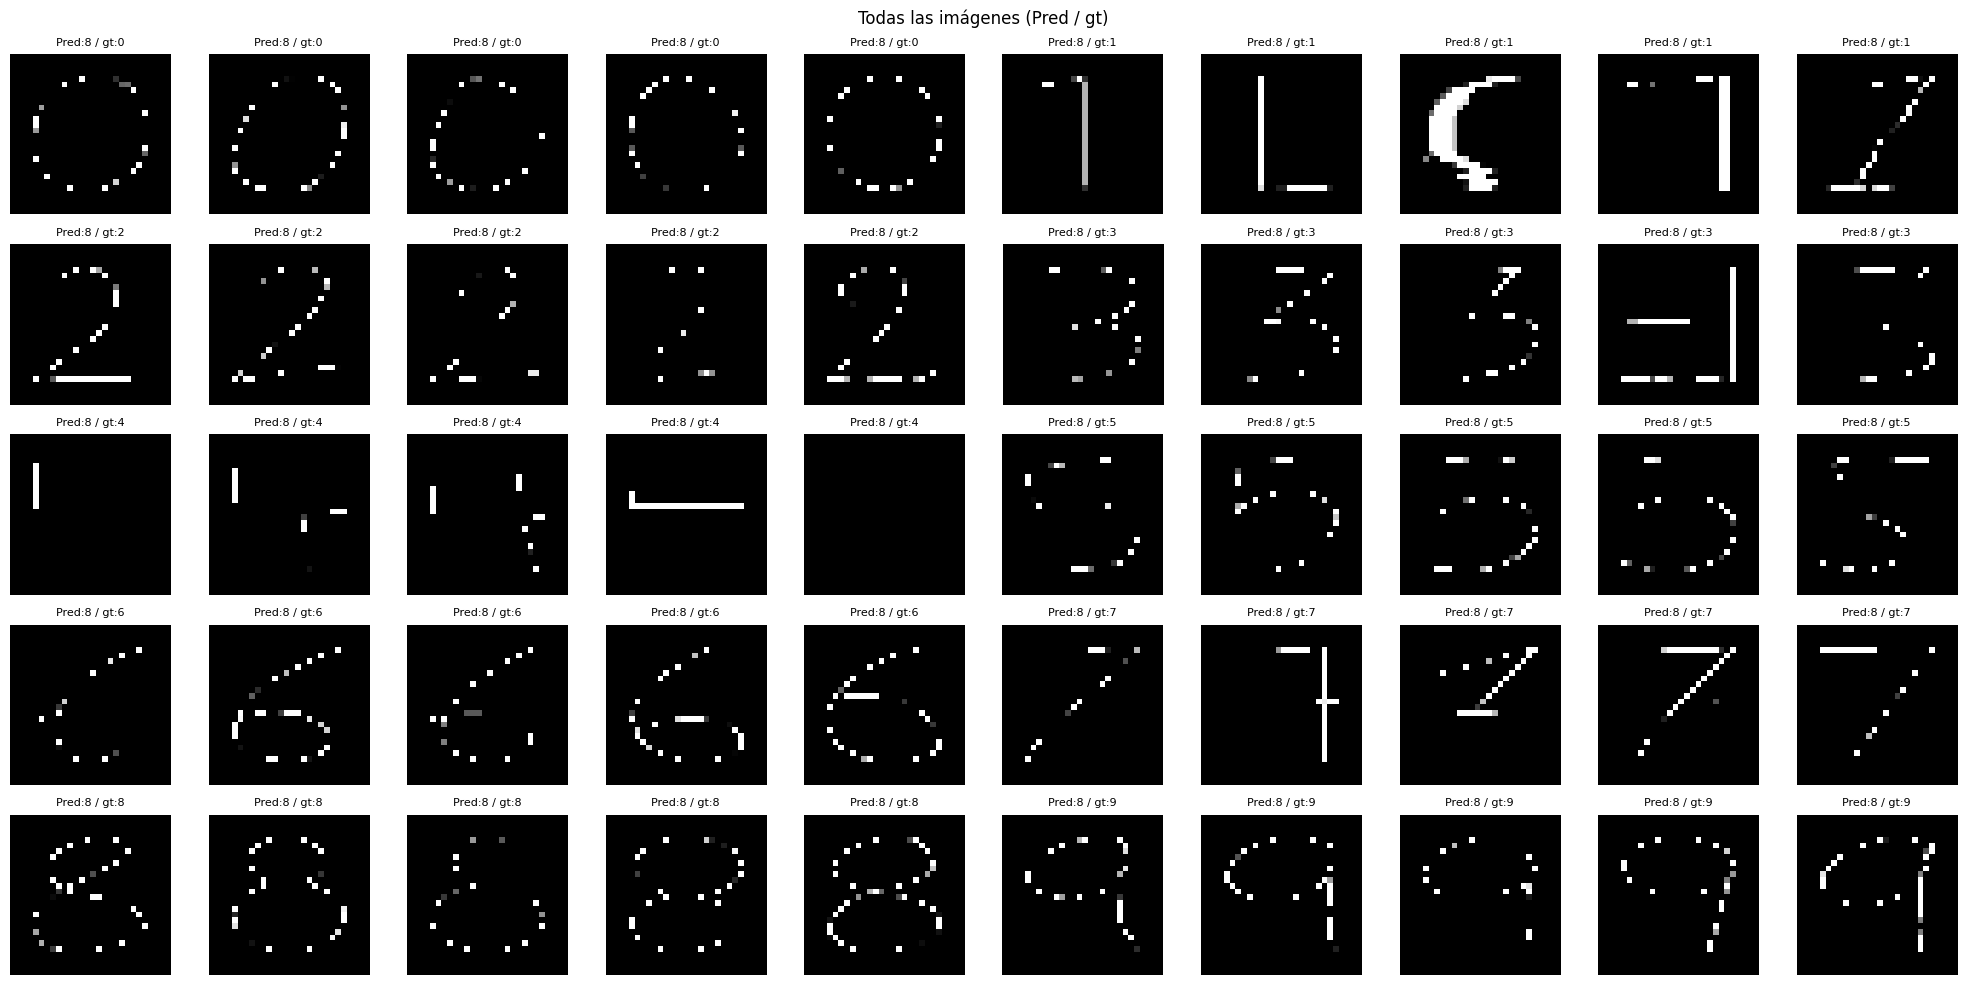


Exactitud en tus imágenes (etiquetadas): 0.1000



In [11]:
from google.colab import files
import os, zipfile, io, glob, shutil
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import math
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Sube imágenes (.png/.jpg/...)")
uploaded = files.upload()

root_dir = "/content/user_images"
if os.path.exists(root_dir):
    shutil.rmtree(root_dir)
os.makedirs(root_dir, exist_ok=True)
all_paths = []

for name, data in uploaded.items():
    dest = os.path.join(root_dir, name)
    with open(dest, "wb") as f:
        f.write(data)
    if name.lower().endswith(".zip"):
        with zipfile.ZipFile(io.BytesIO(data), 'r') as z:
            z.extractall(root_dir)
    else:
        all_paths.append(dest)

ALLOWED_EXTS = (".png", ".jpg", ".jpeg", ".bmp")
for ext in ALLOWED_EXTS:
    all_paths += glob.glob(os.path.join(root_dir, "**", f"*{ext}"), recursive=True)

all_paths = sorted({p for p in all_paths if p.lower().endswith(ALLOWED_EXTS)})
print("Total imágenes detectadas:", len(all_paths))
if not all_paths:
    raise SystemExit("No se encontraron imágenes válidas.")

# === Preprocesamiento con mejoras nuevas ===
def preprocess_to_mnist(img):
    # 1. Desenfoque Gaussiano para reducir ruido
    img = cv2.GaussianBlur(img, (3, 3), 0)

    # 2. Umbral adaptativo para binarización robusta
    img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                cv2.THRESH_BINARY_INV, blockSize=11, C=2)

    # 3. Recorte automático del dígito
    coords = cv2.findNonZero(img)
    if coords is not None:
        x, y, w, h = cv2.boundingRect(coords)
        img = img[y:y+h, x:x+w]
    else:
        print("[AVISO] Imagen vacía tras binarización")

    img = cv2.resize(img, (20, 20))
    padded = np.pad(img, ((4, 4), (4, 4)), mode='constant', constant_values=0)
    padded = padded.astype("float32") / 255.0
    padded = np.expand_dims(padded, axis=-1)

    return padded

def infer_label_from_path(path):
    for d in range(10):
        if f"/{d}/" in path or f"\\{d}\\" in path or f"{d}_" in os.path.basename(path):
            return d
    return None

X_user, y_user, names = [], [], []
for p in all_paths:
    img = cv2.imread(p, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print("[AVISO] No se pudo leer:", p)
        continue
    X_user.append(preprocess_to_mnist(img))
    y_user.append(infer_label_from_path(p))
    names.append(os.path.basename(p))

X_user = np.array(X_user)

def prepare_for_model(X, model):
    return X.reshape(-1, 28, 28, 1)

# === Cargar modelo y predecir ===
model = tf.keras.models.load_model("my_model.h5")
Xin = prepare_for_model(X_user, model)
pred_probs = model.predict(Xin, verbose=0)
y_pred = np.argmax(pred_probs, axis=1)
confs = pred_probs.max(axis=1)

# === Mostrar resultados ===
order = list(range(len(X_user)))
def _key(i):
    gt = y_user[i]
    return (gt if gt is not None else 99, names[i])
order.sort(key=_key)

print("\nIdx | gt | pred | prob  | archivo")
print("----+----+------+-------+--------------------------------")
for k, i in enumerate(order, 1):
    gt = y_user[i] if y_user[i] is not None else "?"
    print(f"{k:02d}  | {gt!s:>2} |  {y_pred[i]:>2}  | {confs[i]:.3f} | {names[i]}")

N = len(order)
cols = 10
rows = math.ceil(N / cols)
plt.figure(figsize=(2*cols, 2*rows))
for j, i in enumerate(order):
    ax = plt.subplot(rows, cols, j+1)
    ax.imshow(X_user[i].reshape(28,28), cmap='gray')
    title = f"Pred:{y_pred[i]}"
    if y_user[i] is not None:
        title += f" / gt:{y_user[i]}"
    ax.set_title(title, fontsize=8)
    ax.axis('off')
plt.suptitle("Todas las imágenes (Pred / gt)", y=0.98)
plt.tight_layout()
plt.show()

# === Exactitud ===
idx_labeled = [i for i, lbl in enumerate(y_user) if lbl is not None]
if idx_labeled:
    y_true = np.array([y_user[i] for i in idx_labeled], dtype=int)
    y_pred_sub = y_pred[idx_labeled]

    acc = accuracy_score(y_true, y_pred_sub)
    print(f"\nExactitud en tus imágenes (etiquetadas): {acc:.4f}\n")

Aunque la exactitud del modelo bajó al 10% en esta segunda prueba, las imágenes procesadas son visualmente más claras y legibles. Esto indica que, aunque el modelo aún no se adapta bien al nuevo formato, el preprocesamiento logró mejorar la calidad visual, lo que puede facilitar futuras correcciones o ajustes en el entrenamiento.

In [12]:
from google.colab import files
files.download('my_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>